In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [8]:
# Random measurments load results

result = {}
for n in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    result[n] = {}
    for degree in [2, 3, 4, 5]:
        result[n][degree] = {}
        my_range = np.linspace(0.4 *degree*np.log2(n), 6 * degree*np.log2(n), 50)
        m_list = [int(a) for a in my_range]
        for m in m_list:
            result[n][degree][m] = []
            for try_no in range(20):
                try:
                    f =open(f"results/n={n}_m={m}_d={degree}_{try_no}.json")
                    data = json.loads(f.read())
                    result[n][degree][m].append(data)
                except:
                    print(f"Couldn't find results/n={n}_m={m}_d={degree}_{try_no}.json")
                    print(f"Assume job failed")
                    data = {'status': False, 'time':60*60*4, 'n': n, 'm': m, 'd': degree}
                    result[n][degree][m].append(data)
                        

Couldn't find results/n=2048_m=37_d=4_19.json
Assume job failed
Couldn't find results/n=2048_m=47_d=4_16.json
Assume job failed
Couldn't find results/n=2048_m=72_d=4_1.json
Assume job failed
Couldn't find results/n=2048_m=72_d=4_10.json
Assume job failed
Couldn't find results/n=2048_m=77_d=4_2.json
Assume job failed
Couldn't find results/n=2048_m=77_d=4_14.json
Assume job failed
Couldn't find results/n=2048_m=82_d=4_1.json
Assume job failed
Couldn't find results/n=2048_m=88_d=4_6.json
Assume job failed
Couldn't find results/n=2048_m=98_d=4_2.json
Assume job failed
Couldn't find results/n=2048_m=98_d=4_10.json
Assume job failed
Couldn't find results/n=2048_m=98_d=4_16.json
Assume job failed
Couldn't find results/n=2048_m=163_d=4_7.json
Assume job failed
Couldn't find results/n=2048_m=178_d=4_16.json
Assume job failed
Couldn't find results/n=2048_m=183_d=4_8.json
Assume job failed
Couldn't find results/n=2048_m=198_d=4_18.json
Assume job failed
Couldn't find results/n=2048_m=203_d=4_10.j

2


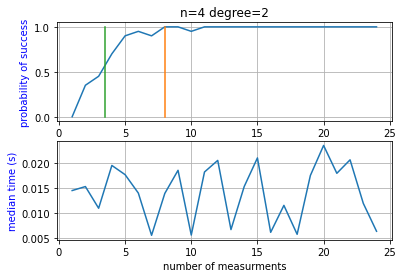

3


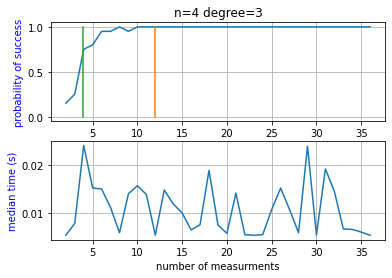

4


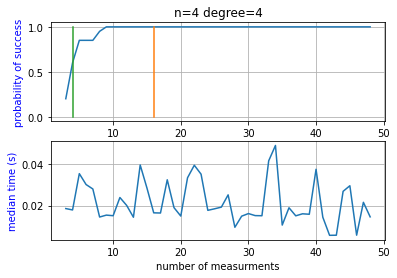

5


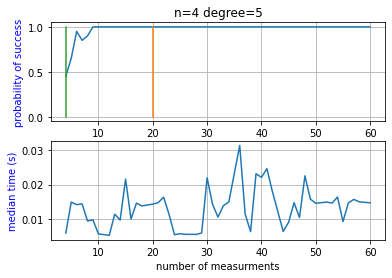

2


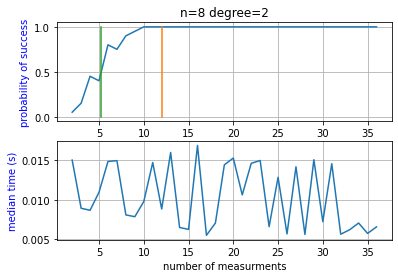

3


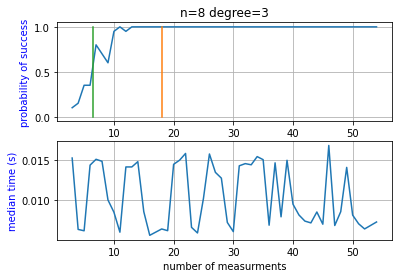

4


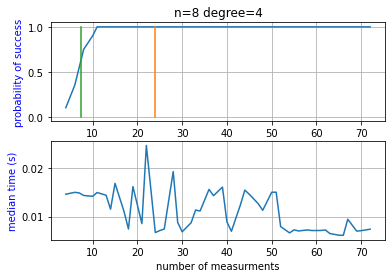

5


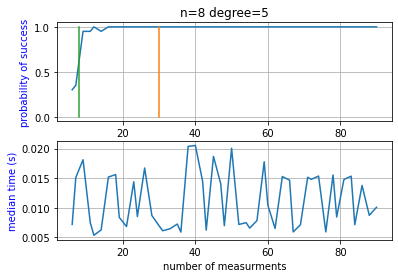

2


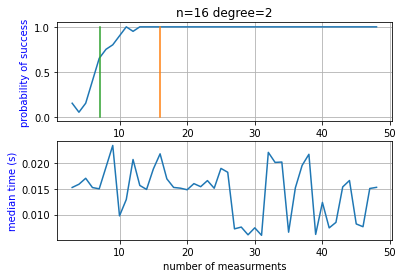

3


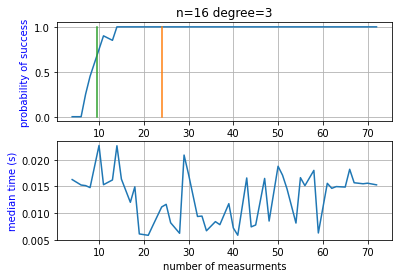

4


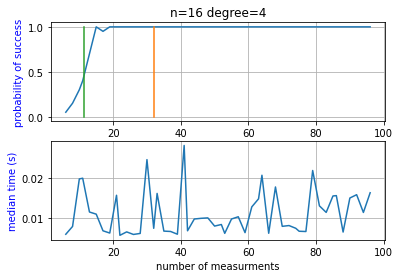

5


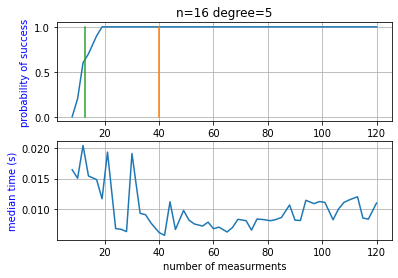

2


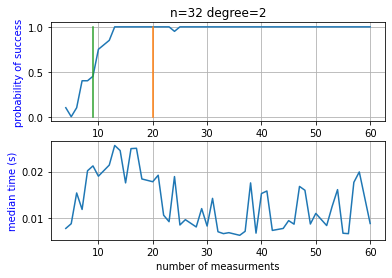

3


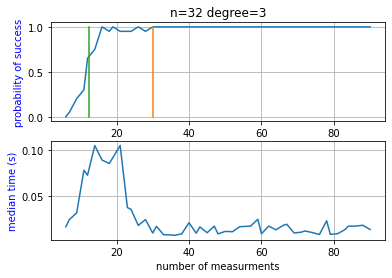

4


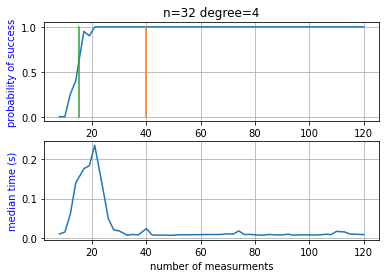

5


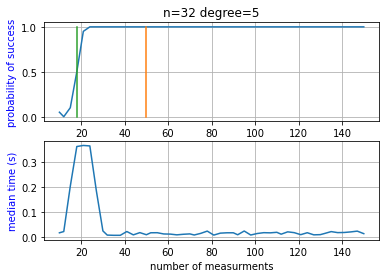

2


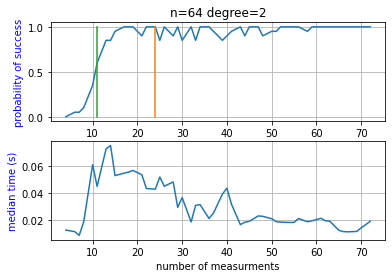

3


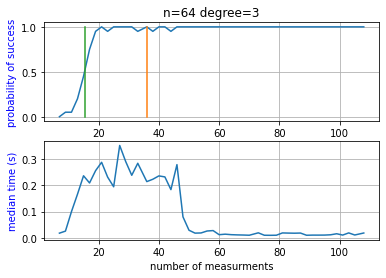

4


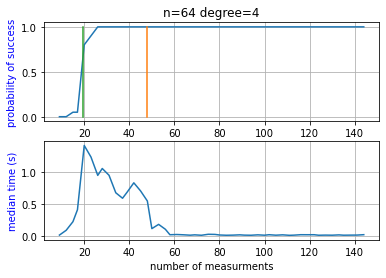

5


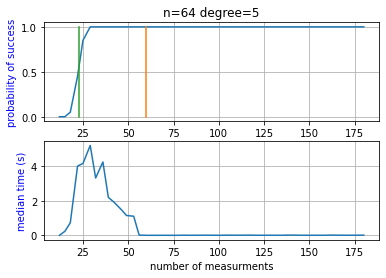

2


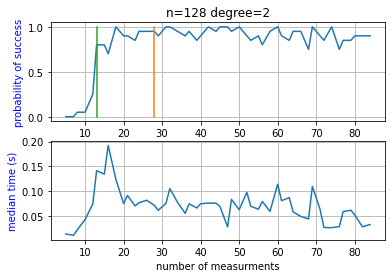

3


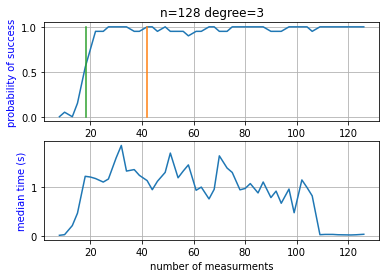

4


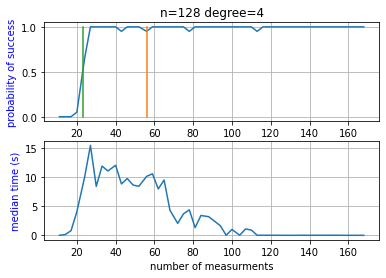

5


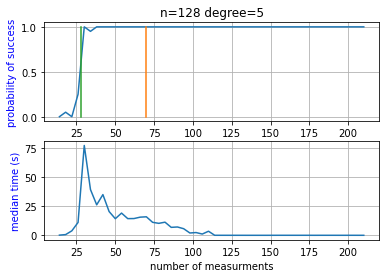

2


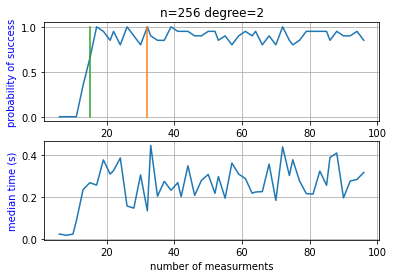

3


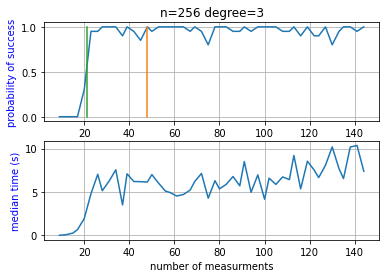

4


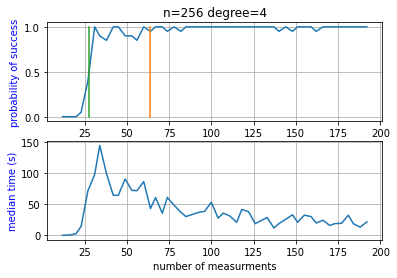

5


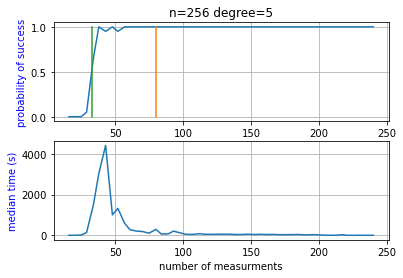

2


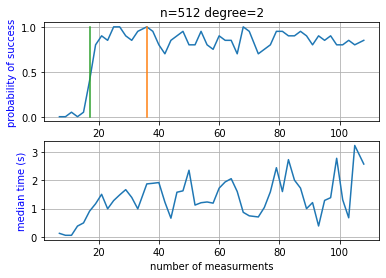

3


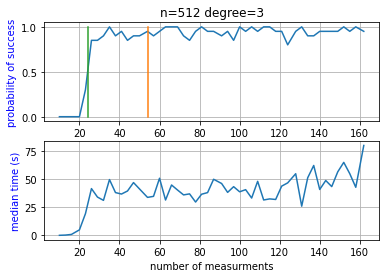

4


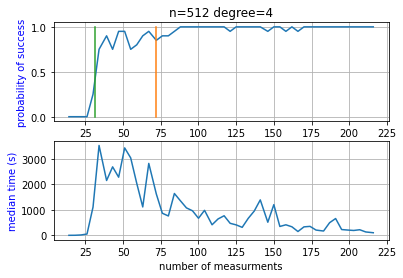

5


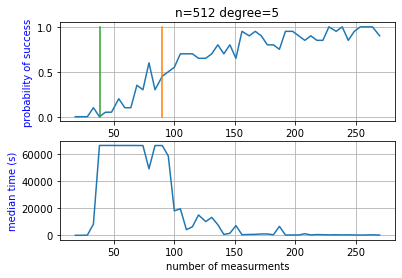

2


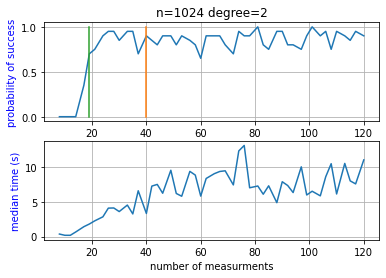

3


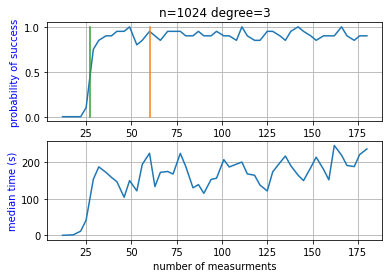

4


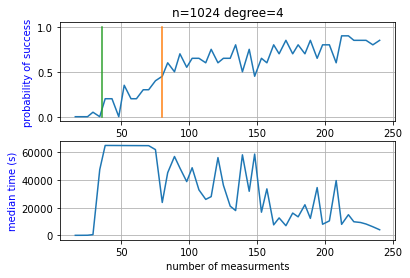

5


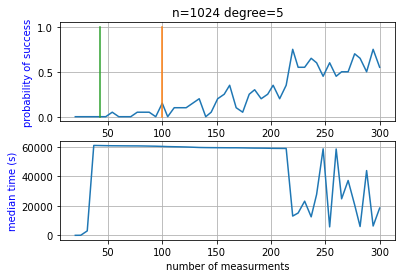

2


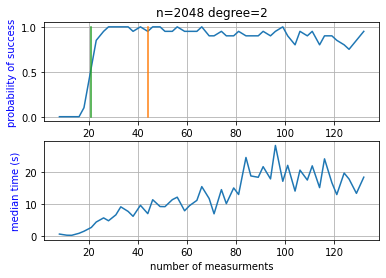

3


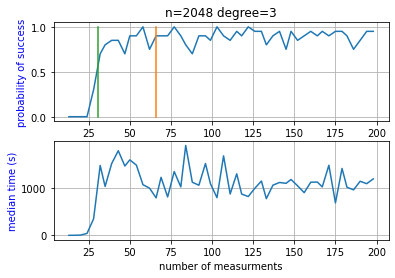

4


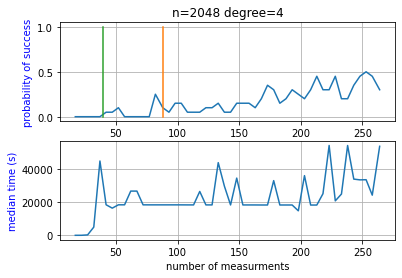

5


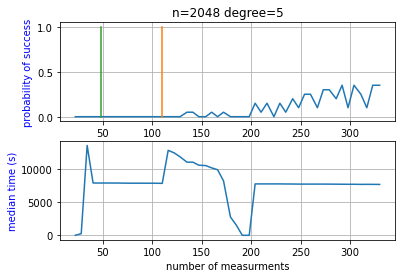

In [9]:
# Random measurements plot results
for n in result:
    for degree in result[n]:
        no_measurements , p_failure, time  = [], [], []
        print(degree)
        for m in result[n][degree]:
            p = sum([1 for j in range(20) if result[n][degree][m][j]["status"]==True])/20
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(20)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, label="random")
        ax1.plot( [2*degree*np.log2(n)]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        
        
        
        plt.show()
           

In [20]:
# Binning and reed-solomon load the results
from math import ceil 
result_binning = {}
result_reedsolomon = {}
for n in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
    n = 3*n // 2
    result_binning[n] = {}
    for degree in [2,3,4,5,6]:
        result_binning[n][degree] = {}
        no_bins_range = np.linspace(0.1 * degree**2,  degree**2, 10)
        no_bins_range = [ceil(a) for a in no_bins_range]
        for no_bins in no_bins_range:
            for no_iterations in [1,2,3,4,5]:
                for ratio in [1.2,1.3,1.4,1.5,1.6]:
                    for try_no in range(10):
                        with open(f"results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json") as f:
                            try:
                                data = json.loads(f.read())
                                m = data["measurements"]
                                try:
                                    result_binning[n][degree][m].append(data)
                                except:
                                    result_binning[n][degree][m] = [data]
                            except:
                                print(f"couldn't find results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json")
       
            
                        

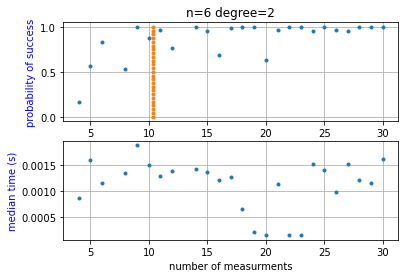

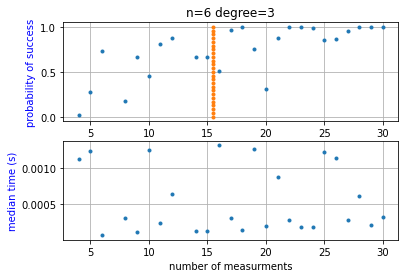

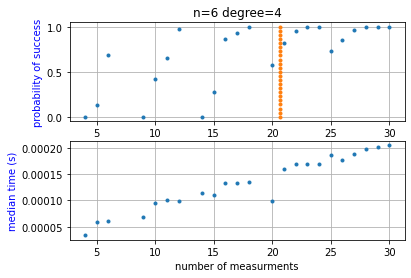

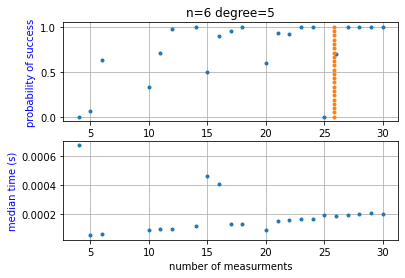

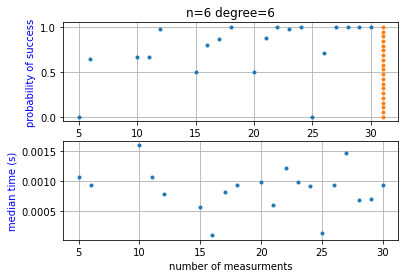

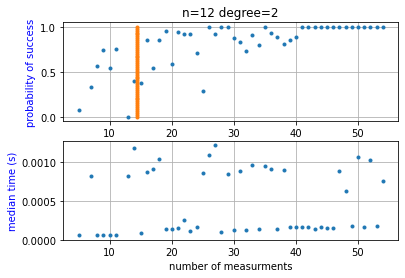

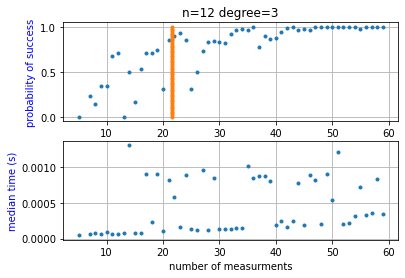

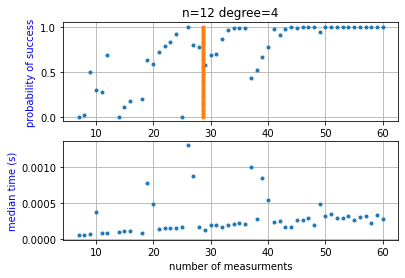

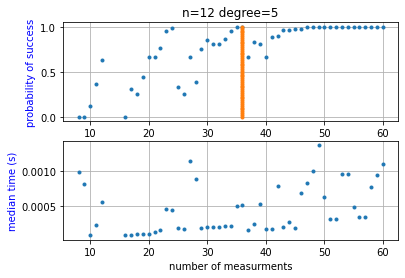

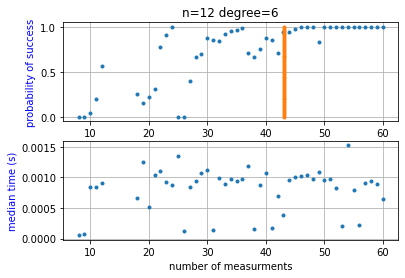

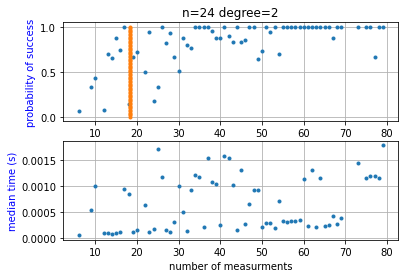

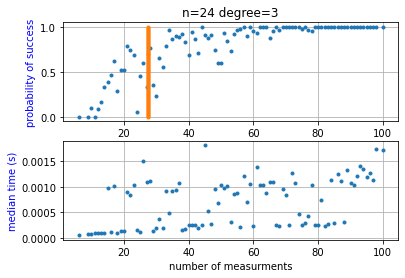

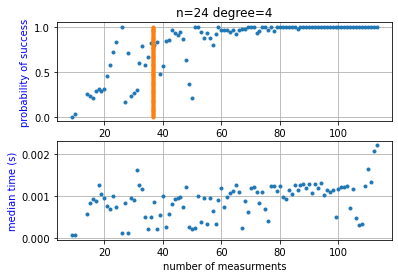

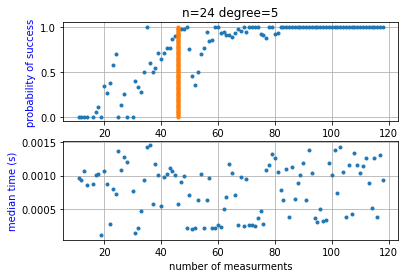

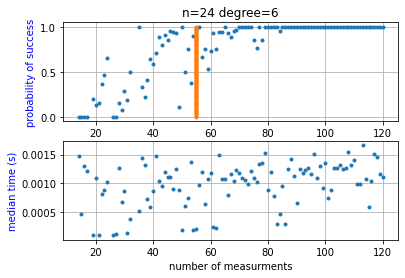

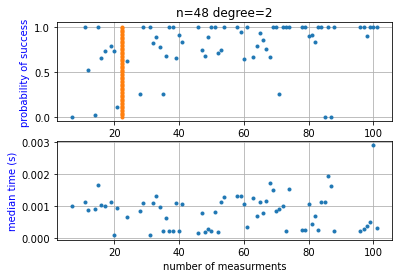

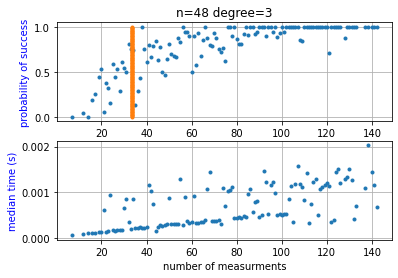

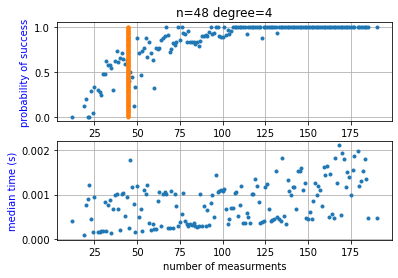

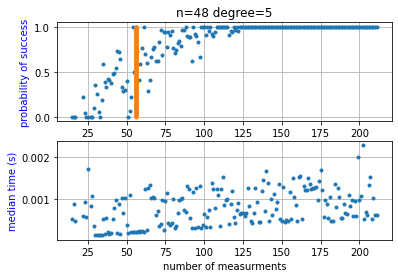

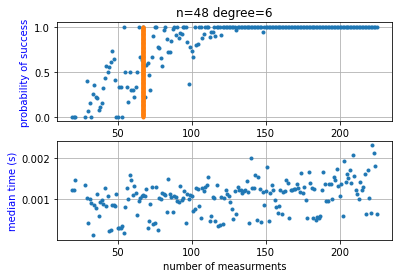

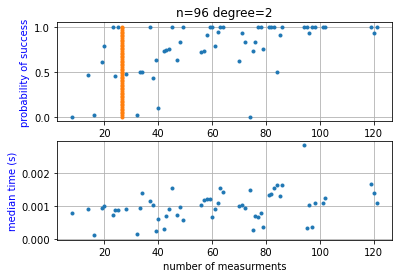

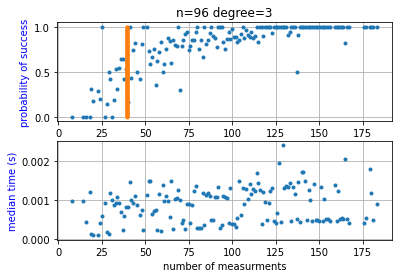

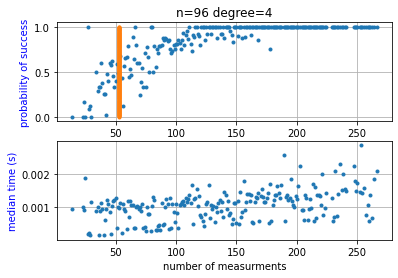

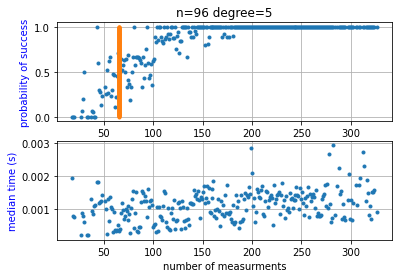

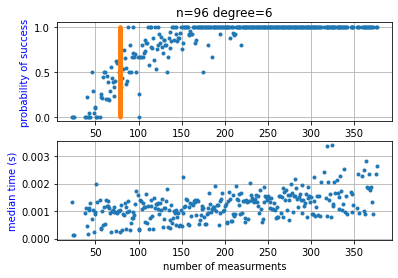

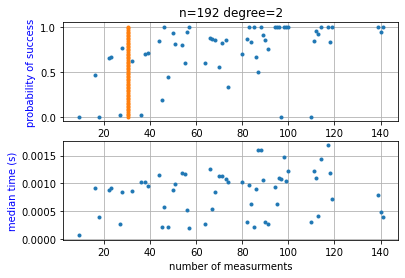

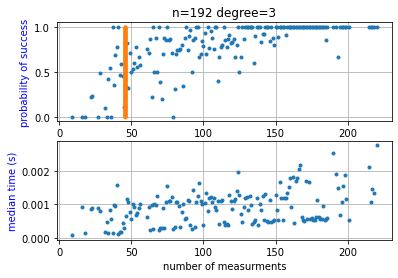

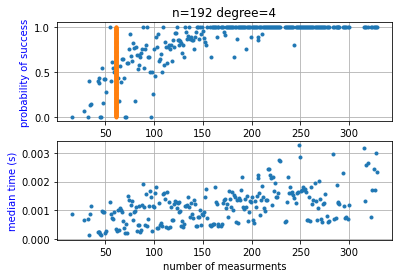

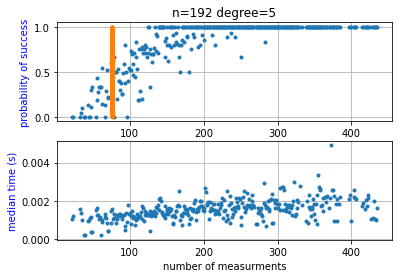

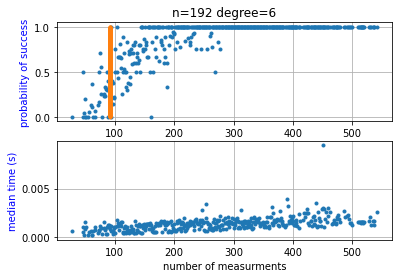

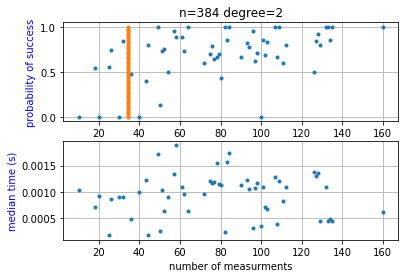

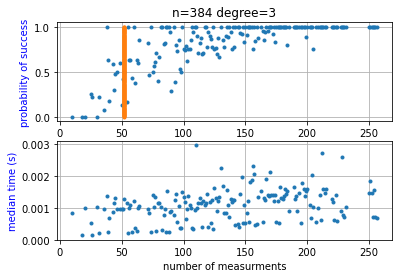

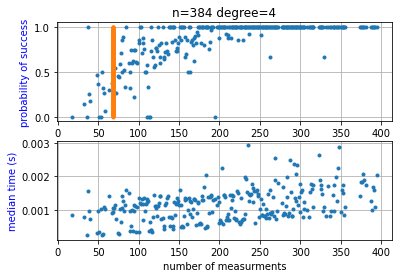

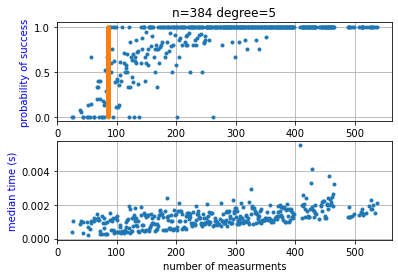

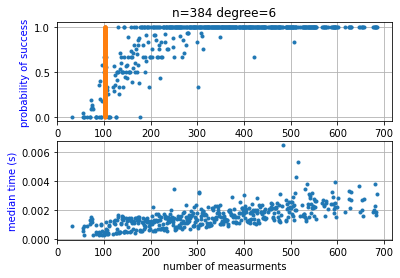

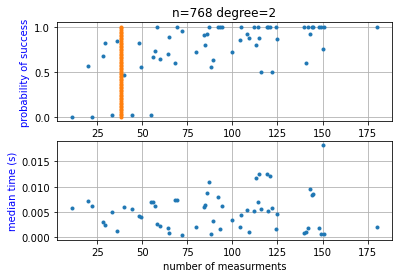

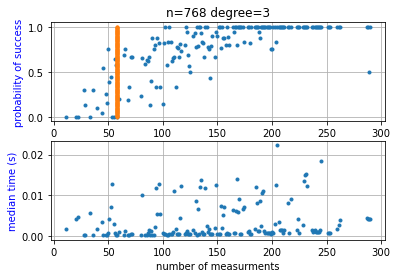

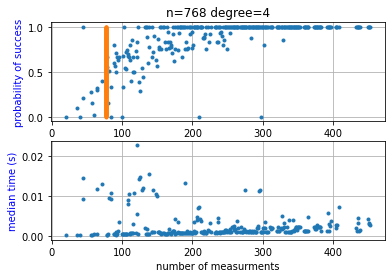

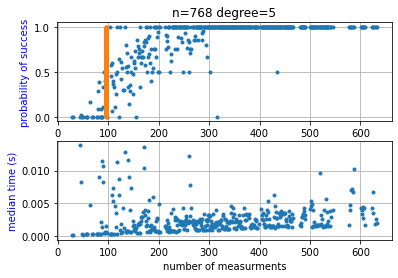

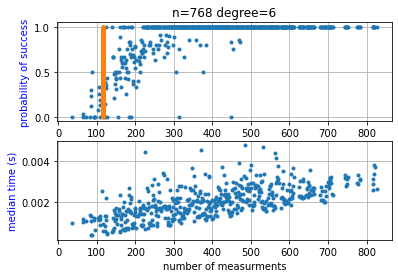

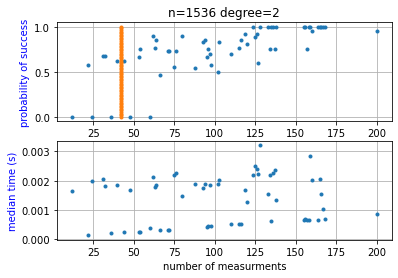

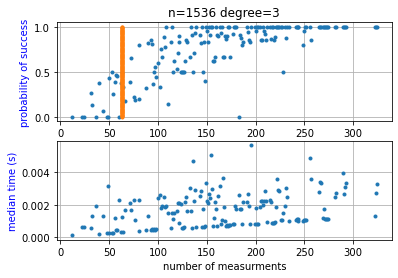

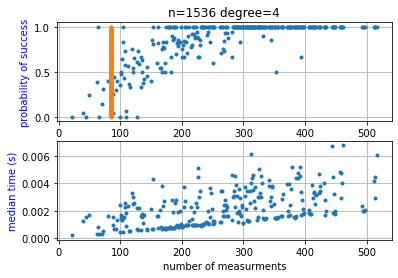

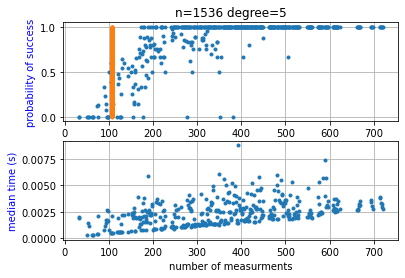

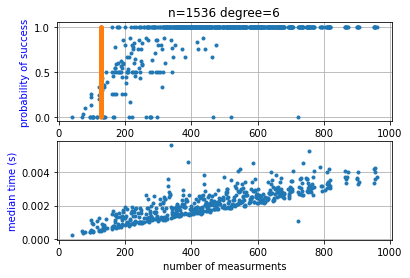

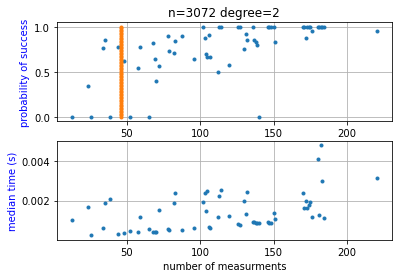

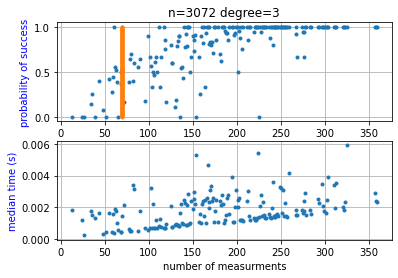

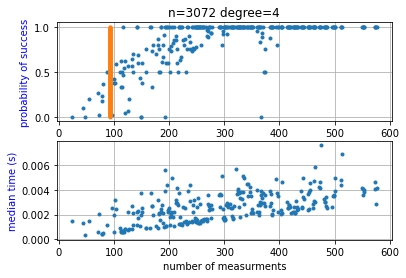

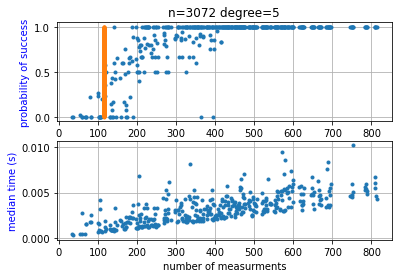

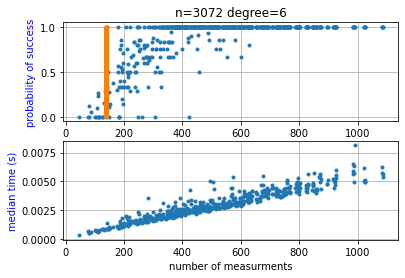

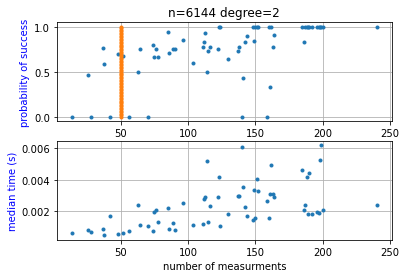

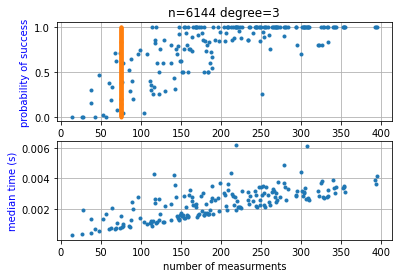

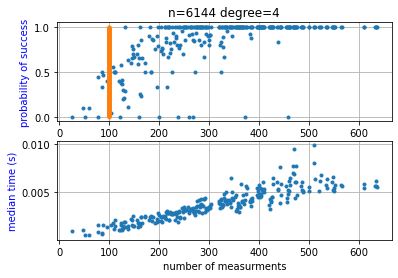

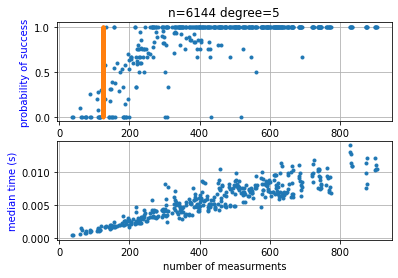

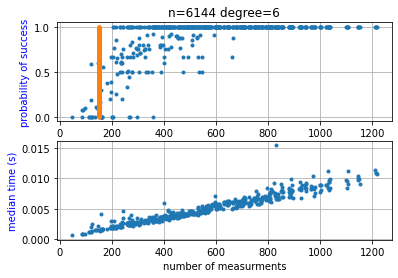

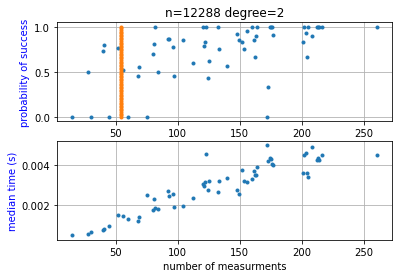

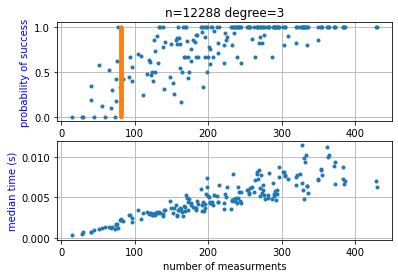

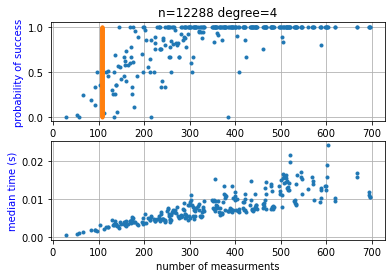

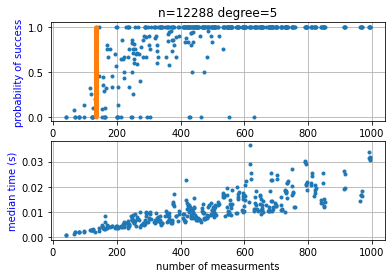

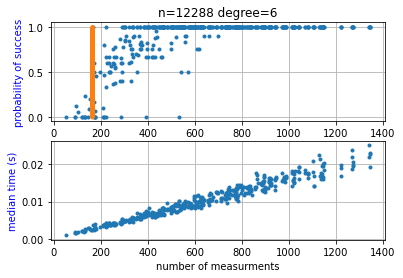

In [22]:
# Binning and reed-solomon plot the results
for n in result_binning:
    for degree in result_binning[n]:
        no_measurements , p_failure, time  = [], [], []
        for m in result_binning[n][degree]:
            l = len(result_binning[n][degree][m])
            p = sum([1 for j in range(l) if result_binning[n][degree][m][j]["status"]==True])/l
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result_binning[n][degree][m][j]["time"] for j in range(l)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, ".")
        ax1.plot([2*degree*np.log2(n)]*my_len, np.linspace(0,1,my_len), ".")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time, ".")
        
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        
        
        
        plt.show()
           

In [6]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def lower_bound(n,d):
    return np.log2(sum([ncr(n,i) for i in range(0,d+1)]))

In [ ]:
print(data)